**MISSING DATA HANDLING AND OUTLIER ANALYSIS**



Data preprocessing is the first and foremost step in data analysis. Data preprocessing converts the data in its raw form into a more readable format (graphs, documents, etc.),which can be interpreted and analyzed in the further stages. 

The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India. They also have a real-time monitoring app: https://app.cpcbccr.com/AQI_India/

Why is handling missing data important?

1. Missing data reduces statistical power, which refers to the probability that the test will reject the null hypothesis when it is false. 
2. The lost data can cause bias in the estimation of parameters.
3. It can reduce the representativeness of the samples.
4. It may complicate the analysis of the study. 

Each of these distortions may threaten the validity of the trials and can lead to invalid conclusions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel (r'/content/Data 2017-2022.xlsx', sheet_name='Chennai')

In [3]:
df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,NaN,2.36,9.78,NaN,NaN,2.11,NaN,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,NaN,2.33,8.21,NaN,NaN,2.86,NaN,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,NaN,11.39,17.28,NaN,NaN,7.73,NaN,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,NaN,6.06,12.32,NaN,NaN,2.72,NaN,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,NaN,5.58,12.67,NaN,NaN,2.65,NaN,25.89,0.60,3.53


In [4]:
df.shape

(1885, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        1885 non-null   object 
 1   To Date          1885 non-null   object 
 2   PM2.5 (ug/m3)    1841 non-null   float64
 3   PM10 (ug/m3)     306 non-null    float64
 4   NO (ug/m3)       1844 non-null   float64
 5   NO2 (ug/m3)      1843 non-null   float64
 6   NOx (ppb)        1598 non-null   float64
 7   NH3 (ug/m3)      306 non-null    float64
 8   SO2 (ug/m3)      1830 non-null   float64
 9   CO (mg/m3)       1687 non-null   float64
 10  Ozone (ug/m3)    1833 non-null   float64
 11  Benzene (ug/m3)  1859 non-null   float64
 12  Toluene (ug/m3)  1859 non-null   float64
dtypes: float64(11), object(2)
memory usage: 191.6+ KB


In [6]:
#no of null values in each column
df.isna().sum()

From Date             0
To Date               0
PM2.5 (ug/m3)        44
PM10 (ug/m3)       1579
NO (ug/m3)           41
NO2 (ug/m3)          42
NOx (ppb)           287
NH3 (ug/m3)        1579
SO2 (ug/m3)          55
CO (mg/m3)          198
Ozone (ug/m3)        52
Benzene (ug/m3)      26
Toluene (ug/m3)      26
dtype: int64

In [7]:
df.mean(numeric_only=True)

PM2.5 (ug/m3)      30.500435
PM10 (ug/m3)       58.150719
NO (ug/m3)          6.952950
NO2 (ug/m3)        12.557347
NOx (ppb)          16.026608
NH3 (ug/m3)        12.271961
SO2 (ug/m3)         6.551770
CO (mg/m3)          0.827825
Ozone (ug/m3)      27.580562
Benzene (ug/m3)     0.583018
Toluene (ug/m3)     1.940172
dtype: float64

In [8]:
df.median(numeric_only=True)

PM2.5 (ug/m3)      27.280
PM10 (ug/m3)       67.250
NO (ug/m3)          5.460
NO2 (ug/m3)        11.280
NOx (ppb)          14.615
NH3 (ug/m3)        14.455
SO2 (ug/m3)         4.880
CO (mg/m3)          0.740
Ozone (ug/m3)      24.680
Benzene (ug/m3)     0.000
Toluene (ug/m3)     0.190
dtype: float64

In [9]:
df.var(numeric_only=True)

PM2.5 (ug/m3)      411.678015
PM10 (ug/m3)       672.376420
NO (ug/m3)          31.483505
NO2 (ug/m3)         75.819259
NOx (ppb)           77.394611
NH3 (ug/m3)         30.887305
SO2 (ug/m3)         25.583531
CO (mg/m3)           2.167166
Ozone (ug/m3)      282.994183
Benzene (ug/m3)      4.968048
Toluene (ug/m3)     19.185895
dtype: float64

In [10]:
df.std(numeric_only=True)

PM2.5 (ug/m3)      20.289850
PM10 (ug/m3)       25.930222
NO (ug/m3)          5.611016
NO2 (ug/m3)         8.707426
NOx (ppb)           8.797421
NH3 (ug/m3)         5.557635
SO2 (ug/m3)         5.058016
CO (mg/m3)          1.472130
Ozone (ug/m3)      16.822431
Benzene (ug/m3)     2.228912
Toluene (ug/m3)     4.380171
dtype: float64

In [11]:
df.cov()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
PM2.5 (ug/m3),411.678015,30.890050,16.066220,51.241957,40.344852,13.933097,-0.923446,-1.522403,60.713479,0.625041,10.737620
PM10 (ug/m3),30.890050,672.376420,-44.806987,-24.387463,-61.393595,-18.579278,0.531256,0.001428,38.184933,0.034594,0.074053
NO (ug/m3),16.066220,-44.806987,31.483505,22.519439,36.589019,19.546962,-1.680204,-0.332261,-0.932329,1.625605,4.639590
NO2 (ug/m3),51.241957,-24.387463,22.519439,75.819259,55.207391,22.055663,-3.889626,-0.253260,14.139986,1.354755,9.701272
NOx (ppb),40.344852,-61.393595,36.589019,55.207391,77.394611,39.637911,-3.141972,0.158700,5.818156,2.326780,11.059783
NH3 (ug/m3),13.933097,-18.579278,19.546962,22.055663,39.637911,30.887305,8.791461,0.259349,23.173855,0.043199,0.036882
SO2 (ug/m3),-0.923446,0.531256,-1.680204,-3.889626,-3.141972,8.791461,25.583531,-0.472042,2.729160,-1.098227,-3.746441
CO (mg/m3),-1.522403,0.001428,-0.332261,-0.253260,0.158700,0.259349,-0.472042,2.167166,-0.128536,-0.030333,-0.073975
Ozone (ug/m3),60.713479,38.184933,-0.932329,14.139986,5.818156,23.173855,2.729160,-0.128536,282.994183,-0.550818,-0.989454
Benzene (ug/m3),0.625041,0.034594,1.625605,1.354755,2.326780,0.043199,-1.098227,-0.030333,-0.550818,4.968048,4.877070


In [12]:
df.corr()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
PM2.5 (ug/m3),1.000000,0.077045,0.140907,0.290013,0.217120,0.161947,-0.009008,-0.049465,0.178225,0.013715,0.120031
PM10 (ug/m3),0.077045,1.000000,-0.342711,-0.205761,-0.272646,-0.128751,0.004149,0.000288,0.058454,0.011016,0.022940
NO (ug/m3),0.140907,-0.342711,1.000000,0.460980,0.714484,0.702132,-0.059458,-0.039316,-0.009927,0.129351,0.188078
NO2 (ug/m3),0.290013,-0.205761,0.460980,1.000000,0.724070,0.871728,-0.089198,-0.019531,0.097121,0.069390,0.253154
NOx (ppb),0.217120,-0.272646,0.714484,0.724070,1.000000,0.825683,-0.068077,0.011973,0.038354,0.122707,0.278826
NH3 (ug/m3),0.161947,-0.128751,0.702132,0.871728,0.825683,1.000000,0.323777,0.242040,0.170788,0.064346,0.053442
SO2 (ug/m3),-0.009008,0.004149,-0.059458,-0.089198,-0.068077,0.323777,1.000000,-0.061407,0.032032,-0.096417,-0.167630
CO (mg/m3),-0.049465,0.000288,-0.039316,-0.019531,0.011973,0.242040,-0.061407,1.000000,-0.008149,-0.008974,-0.010942
Ozone (ug/m3),0.178225,0.058454,-0.009927,0.097121,0.038354,0.170788,0.032032,-0.008149,1.000000,-0.014557,-0.013333
Benzene (ug/m3),0.013715,0.011016,0.129351,0.069390,0.122707,0.064346,-0.096417,-0.008974,-0.014557,1.000000,0.499545


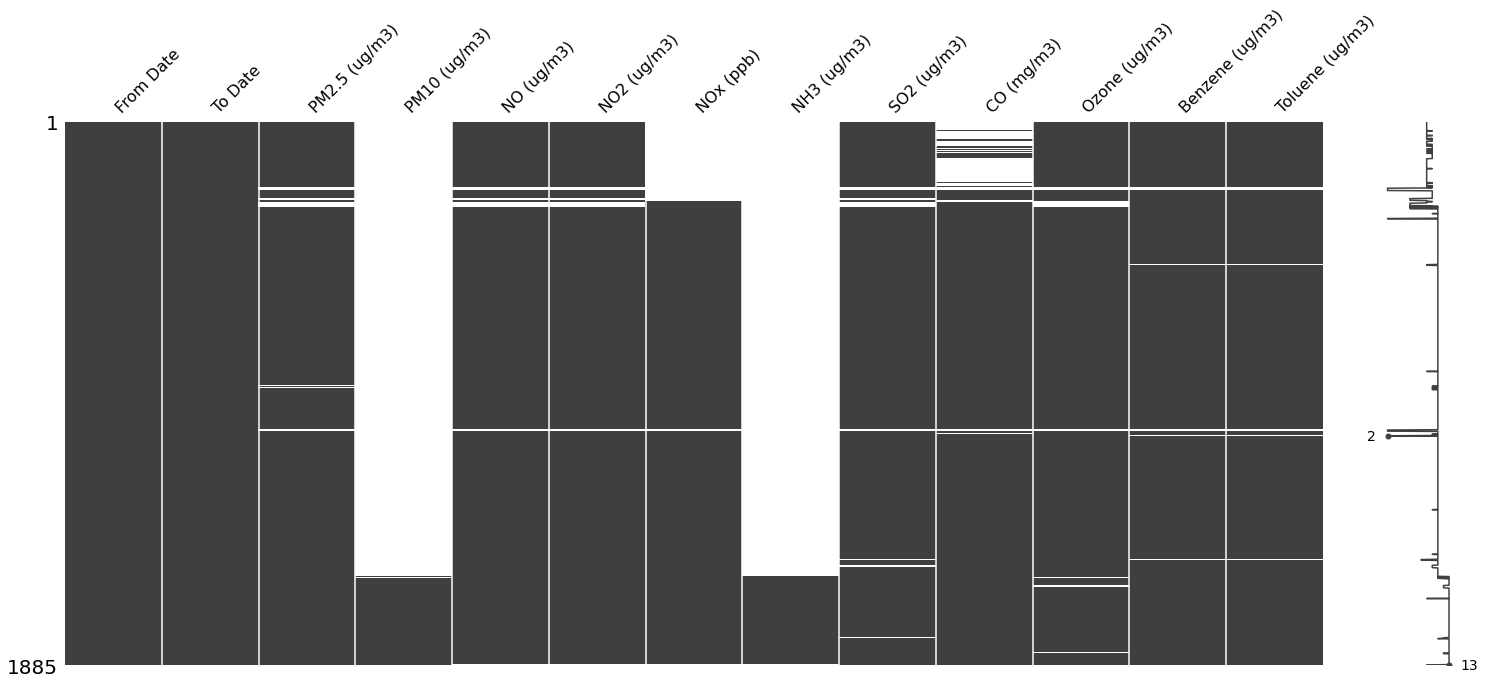

In [13]:
#this is plot shows how amuch missing values in the dataset, and its clearly visible that almost PM10 and NH3 has no data.
import missingno as msno
msno.matrix(df)

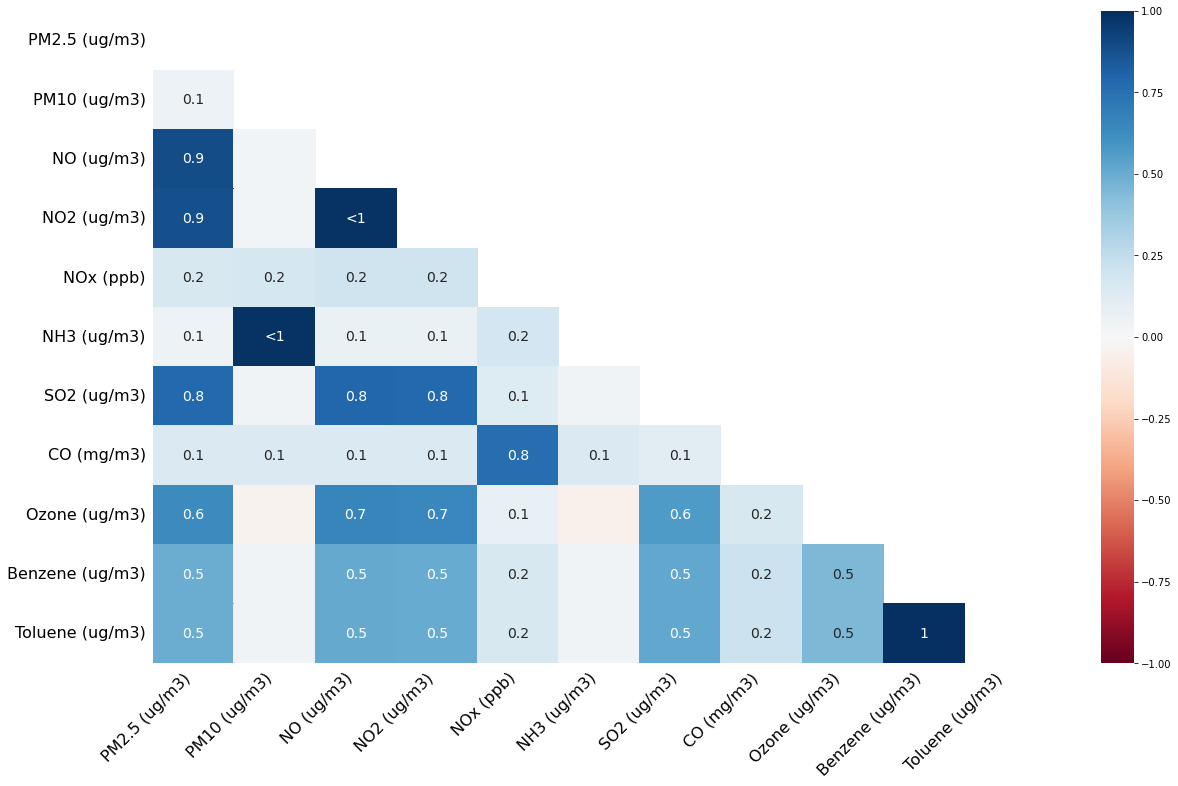

In [14]:
#helps in visualizing the correlation betwwen all the columns
# Both NO and NO2 has strong positive correlation with PM2.5
msno.heatmap(df)

# **MISSING DATA HANDLING**


#Listwise deletion

The process of deleting data for any case that has one or more missing values.
It is also known as complete case analysis.

In [15]:
df1 = pd.read_excel (r'/content/Data 2017-2022.xlsx', sheet_name='Chennai')

In [16]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        1885 non-null   object 
 1   To Date          1885 non-null   object 
 2   PM2.5 (ug/m3)    1841 non-null   float64
 3   PM10 (ug/m3)     306 non-null    float64
 4   NO (ug/m3)       1844 non-null   float64
 5   NO2 (ug/m3)      1843 non-null   float64
 6   NOx (ppb)        1598 non-null   float64
 7   NH3 (ug/m3)      306 non-null    float64
 8   SO2 (ug/m3)      1830 non-null   float64
 9   CO (mg/m3)       1687 non-null   float64
 10  Ozone (ug/m3)    1833 non-null   float64
 11  Benzene (ug/m3)  1859 non-null   float64
 12  Toluene (ug/m3)  1859 non-null   float64
dtypes: float64(11), object(2)
memory usage: 191.6+ KB


In [17]:
df1.isnull().sum() #finding the count of null values

From Date             0
To Date               0
PM2.5 (ug/m3)        44
PM10 (ug/m3)       1579
NO (ug/m3)           41
NO2 (ug/m3)          42
NOx (ppb)           287
NH3 (ug/m3)        1579
SO2 (ug/m3)          55
CO (mg/m3)          198
Ozone (ug/m3)        52
Benzene (ug/m3)      26
Toluene (ug/m3)      26
dtype: int64

In [18]:
df1.shape

(1885, 13)

In [19]:
#deleting all the Rows which have missing values
df1_new =df1.dropna()

In [21]:
df1_new.shape

(286, 13)

The size of the data has drastically reduced after deleting the missing values.If we delete all the rows where we have NaN value the sample size is 286, which is very less value to evaluate the model.

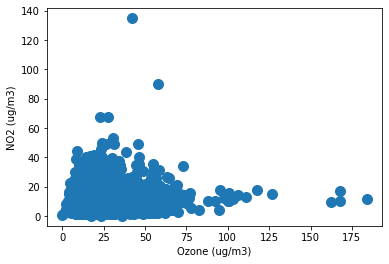

In [22]:
df.plot.scatter(x = "Ozone (ug/m3)", y = 'NO2 (ug/m3)', s = 100);

Scatter plot of Ozone and No2 levels before deletion.




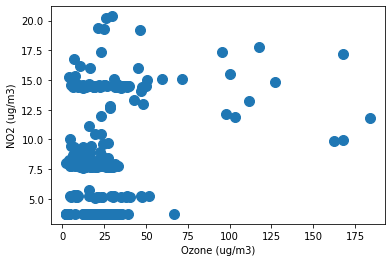

In [23]:
df1_new.plot.scatter(x = "Ozone (ug/m3)", y = 'NO2 (ug/m3)', s = 100);

Listwise deletion scatter plot of Ozone and No2 levels.




#  Pairwise deletion

A method in which data for a variable pertinent to a specific assessment are included, even if values for the same individual on other variables are missing.Its is also known as availiable case analysis.

In [24]:
df2 = pd.read_excel (r'/content/Data 2017-2022.xlsx', sheet_name='Chennai')

In [25]:
#finding percentage of misssing vale in each column
Percent_Missing_Value = df2.isnull().sum()*100/len(df2)
Percent_Missing_Value

From Date           0.000000
To Date             0.000000
PM2.5 (ug/m3)       2.334218
PM10 (ug/m3)       83.766578
NO (ug/m3)          2.175066
NO2 (ug/m3)         2.228117
NOx (ppb)          15.225464
NH3 (ug/m3)        83.766578
SO2 (ug/m3)         2.917772
CO (mg/m3)         10.503979
Ozone (ug/m3)       2.758621
Benzene (ug/m3)     1.379310
Toluene (ug/m3)     1.379310
dtype: float64

If columns have more than half of rows as null then the entire column can be dropped.In PM10 and Nh3 most of the columns almost 84% of the data is missing,so dropping those columns .


In [26]:
df2.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,NaN,2.36,9.78,NaN,NaN,2.11,NaN,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,NaN,2.33,8.21,NaN,NaN,2.86,NaN,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,NaN,11.39,17.28,NaN,NaN,7.73,NaN,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,NaN,6.06,12.32,NaN,NaN,2.72,NaN,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,NaN,5.58,12.67,NaN,NaN,2.65,NaN,25.89,0.60,3.53


In [27]:
#droping PM10 column
df_2 = df2.drop("PM10 (ug/m3)",axis=1)

In [28]:
#droping Nh3 column
df_2 = df2.drop("NH3 (ug/m3)",axis=1)

In [30]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        1885 non-null   object 
 1   To Date          1885 non-null   object 
 2   PM2.5 (ug/m3)    1841 non-null   float64
 3   PM10 (ug/m3)     306 non-null    float64
 4   NO (ug/m3)       1844 non-null   float64
 5   NO2 (ug/m3)      1843 non-null   float64
 6   NOx (ppb)        1598 non-null   float64
 7   SO2 (ug/m3)      1830 non-null   float64
 8   CO (mg/m3)       1687 non-null   float64
 9   Ozone (ug/m3)    1833 non-null   float64
 10  Benzene (ug/m3)  1859 non-null   float64
 11  Toluene (ug/m3)  1859 non-null   float64
dtypes: float64(10), object(2)
memory usage: 176.8+ KB


To find out the relation between Ozone and No2,deleting the missing values pertinent to the columns.




In [31]:
#deleting the missing values from ozone
df2.dropna(subset=['Ozone (ug/m3)'],how='any',inplace=True)
df2['Ozone (ug/m3)'].isnull().sum()


0

In [32]:
#deleting the missing values from Nh3
df2.dropna(subset=['NO2 (ug/m3)'],how='any',inplace=True)
df2['NO2 (ug/m3)'].isnull().sum()

0

In [33]:
df.shape #intial size of the data

(1885, 13)

In [34]:
df2.shape #size after deletion

(1822, 13)

In [35]:
df.describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
count,1841.000000,306.000000,1844.000000,1843.000000,1598.000000,306.000000,1830.000000,1687.000000,1833.000000,1859.000000,1859.000000
mean,30.500435,58.150719,6.952950,12.557347,16.026608,12.271961,6.551770,0.827825,27.580562,0.583018,1.940172
std,20.289850,25.930222,5.611016,8.707426,8.797421,5.557635,5.058016,1.472130,16.822431,2.228912,4.380171
min,0.410000,21.600000,0.010000,0.020000,0.000000,5.360000,0.090000,0.000000,0.100000,0.000000,0.000000
25%,16.540000,36.850000,3.295000,6.510000,9.860000,5.360000,3.890000,0.600000,16.770000,0.000000,0.000000
50%,27.280000,67.250000,5.460000,11.280000,14.615000,14.455000,4.880000,0.740000,24.680000,0.000000,0.190000
75%,39.530000,69.415000,9.400000,16.470000,20.872500,16.675000,7.205000,0.910000,34.770000,0.365000,2.755000
max,278.970000,371.610000,98.620000,134.760000,106.740000,33.680000,37.180000,48.020000,183.990000,46.230000,121.150000


Computing the statistical variables after deletion

In [36]:
df['NO2 (ug/m3)'].describe()

count    1843.000000
mean       12.557347
std         8.707426
min         0.020000
25%         6.510000
50%        11.280000
75%        16.470000
max       134.760000
Name: NO2 (ug/m3), dtype: float64

In [37]:
df2['NO2 (ug/m3)'].describe() 

count    1822.000000
mean       12.634682
std         8.704530
min         0.020000
25%         6.672500
50%        11.360000
75%        16.527500
max       134.760000
Name: NO2 (ug/m3), dtype: float64

In [38]:
df['Ozone (ug/m3)'].describe()

count    1833.000000
mean       27.580562
std        16.822431
min         0.100000
25%        16.770000
50%        24.680000
75%        34.770000
max       183.990000
Name: Ozone (ug/m3), dtype: float64

In [40]:
df2['Ozone (ug/m3)'].describe()

count    1822.000000
mean       27.633079
std        16.725983
min         0.100000
25%        16.832500
50%        24.760000
75%        34.792500
max       183.990000
Name: Ozone (ug/m3), dtype: float64

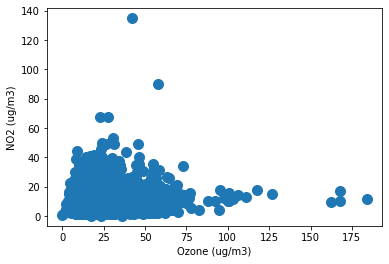

In [41]:
df.plot.scatter(x = "Ozone (ug/m3)", y = 'NO2 (ug/m3)', s = 100);

Scatter plot of Ozone and No2 levels before deletion.

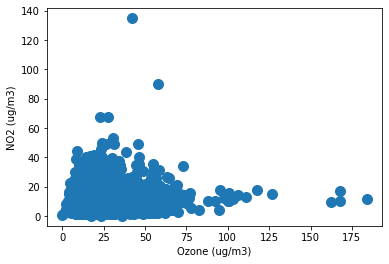

In [42]:
df2.plot.scatter(x = "Ozone (ug/m3)", y = 'NO2 (ug/m3)', s = 100);

Pairwise deletion scatter plot of Ozone and No2 levels. After deletion this resembles similar to the original dataset whereas in listwise the data is more dispersed and scattered.

#Mean imputation

Mean imputation is a method in which the missing values are replaced with the mean value of the entire feature column. 


In [43]:
df3 = pd.read_excel (r'/content/Data 2017-2022.xlsx', sheet_name='Chennai')

In [44]:
#all the missing values in the columns are replaced withe the mean values of the same column
x=['PM2.5 (ug/m3)','PM10 (ug/m3)','NO (ug/m3)','NO2 (ug/m3)','NOx (ppb)','NH3 (ug/m3)','SO2 (ug/m3)','CO (mg/m3)','Ozone (ug/m3)','Benzene (ug/m3)','Toluene (ug/m3)']
df3[x] = df3[x].fillna(df3[x].mean())

In [45]:
df3.head(100)


,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,58.150719,2.36,9.78,16.026608,12.271961,2.11,0.827825,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,58.150719,2.33,8.21,16.026608,12.271961,2.86,0.827825,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,58.150719,11.39,17.28,16.026608,12.271961,7.73,0.827825,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,58.150719,6.06,12.32,16.026608,12.271961,2.72,0.827825,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,58.150719,5.58,12.67,16.026608,12.271961,2.65,0.827825,25.89,0.60,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,06-Apr-2017 - 00:00,07-Apr-2017 - 00:00,42.08,58.150719,4.36,7.03,16.026608,12.271961,3.16,0.827825,25.22,1.41,1.78
96,07-Apr-2017 - 00:00,08-Apr-2017 - 00:00,37.94,58.150719,4.06,8.86,16.026608,12.271961,3.73,1.230000,26.72,1.40,1.77
97,08-Apr-2017 - 00:00,09-Apr-2017 - 00:00,35.41,58.150719,4.75,13.42,16.026608,12.271961,3.85,1.270000,26.48,1.41,1.79
98,09-Apr-2017 - 00:00,10-Apr-2017 - 00:00,34.46,58.150719,3.42,9.20,16.026608,12.271961,3.63,1.150000,26.56,1.40,1.78


In [46]:
df.describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
count,1841.000000,306.000000,1844.000000,1843.000000,1598.000000,306.000000,1830.000000,1687.000000,1833.000000,1859.000000,1859.000000
mean,30.500435,58.150719,6.952950,12.557347,16.026608,12.271961,6.551770,0.827825,27.580562,0.583018,1.940172
std,20.289850,25.930222,5.611016,8.707426,8.797421,5.557635,5.058016,1.472130,16.822431,2.228912,4.380171
min,0.410000,21.600000,0.010000,0.020000,0.000000,5.360000,0.090000,0.000000,0.100000,0.000000,0.000000
25%,16.540000,36.850000,3.295000,6.510000,9.860000,5.360000,3.890000,0.600000,16.770000,0.000000,0.000000
50%,27.280000,67.250000,5.460000,11.280000,14.615000,14.455000,4.880000,0.740000,24.680000,0.000000,0.190000
75%,39.530000,69.415000,9.400000,16.470000,20.872500,16.675000,7.205000,0.910000,34.770000,0.365000,2.755000
max,278.970000,371.610000,98.620000,134.760000,106.740000,33.680000,37.180000,48.020000,183.990000,46.230000,121.150000


In [47]:
df3.mean() #finding the mean after imputation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PM2.5 (ug/m3)      30.500435
PM10 (ug/m3)       58.150719
NO (ug/m3)          6.952950
NO2 (ug/m3)        12.557347
NOx (ppb)          16.026608
NH3 (ug/m3)        12.271961
SO2 (ug/m3)         6.551770
CO (mg/m3)          0.827825
Ozone (ug/m3)      27.580562
Benzene (ug/m3)     0.583018
Toluene (ug/m3)     1.940172
dtype: float64

In [48]:
df3.median() #finding the median after imputation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PM2.5 (ug/m3)      27.590000
PM10 (ug/m3)       58.150719
NO (ug/m3)          5.580000
NO2 (ug/m3)        11.510000
NOx (ppb)          16.026608
NH3 (ug/m3)        12.271961
SO2 (ug/m3)         4.950000
CO (mg/m3)          0.770000
Ozone (ug/m3)      25.150000
Benzene (ug/m3)     0.000000
Toluene (ug/m3)     0.240000
dtype: float64

In [ ]:
df3.std() #finding the standard deviation after imputation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PM2.5 (ug/m3)      20.051520
PM10 (ug/m3)       10.433156
NO (ug/m3)          5.549627
NO2 (ug/m3)         8.609821
NOx (ppb)           8.099671
NH3 (ug/m3)         2.236143
SO2 (ug/m3)         4.983640
CO (mg/m3)          1.392626
Ozone (ug/m3)      16.588650
Benzene (ug/m3)     2.213479
Toluene (ug/m3)     4.349842
dtype: float64

In [49]:
df3.cov() #finding the covariance after imputation

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
PM2.5 (ug/m3),402.063454,4.790271,15.665399,49.936239,33.779861,2.281140,-0.894573,-1.341713,58.637250,0.607667,10.436053
PM10 (ug/m3),4.790271,108.850747,-7.162718,-3.856727,-9.804390,-2.979065,0.284655,0.000231,5.934287,0.004987,0.009948
NO (ug/m3),15.665399,-7.162718,30.798354,22.017413,30.740263,3.164450,-1.628816,-0.291711,-0.898932,1.582438,4.516390
NO2 (ug/m3),49.936239,-3.856727,22.017413,74.129021,46.359606,3.570582,-3.769204,-0.226026,13.671079,1.318097,9.438699
NOx (ppb),33.779861,-9.804390,30.740263,46.359606,65.604667,6.416965,-2.588604,0.133991,4.819938,1.960402,9.320662
NH3 (ug/m3),2.281140,-2.979065,3.164450,3.570582,6.416965,5.000333,1.378188,0.041986,3.464105,0.004861,-0.001140
SO2 (ug/m3),-0.894573,0.284655,-1.628816,-3.769204,-2.588604,1.378188,24.836665,-0.409550,2.621455,-1.062622,-3.624998
CO (mg/m3),-1.341713,0.000231,-0.291711,-0.226026,0.133991,0.041986,-0.409550,1.939407,-0.107126,-0.026996,-0.065842
Ozone (ug/m3),58.637250,5.934287,-0.898932,13.671079,4.819938,3.464105,2.621455,-0.107126,275.183304,-0.532692,-0.956679
Benzene (ug/m3),0.607667,0.004987,1.582438,1.318097,1.960402,0.004861,-1.062622,-0.026996,-0.532692,4.899487,4.809764


In [50]:
df3.corr() #finding the correlation after imputation

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
PM2.5 (ug/m3),1.000000,0.022898,0.140777,0.289251,0.207990,0.050875,-0.008952,-0.048048,0.176285,0.013691,0.119651
PM10 (ug/m3),0.022898,1.000000,-0.123708,-0.042935,-0.116021,-0.127692,0.005475,0.000016,0.034288,0.000216,0.000219
NO (ug/m3),0.140777,-0.123708,1.000000,0.460796,0.683875,0.254997,-0.058893,-0.037745,-0.009765,0.128821,0.187092
NO2 (ug/m3),0.289251,-0.042935,0.460796,1.000000,0.664780,0.185458,-0.087843,-0.018851,0.095719,0.069164,0.252026
NOx (ppb),0.207990,-0.116021,0.683875,0.664780,1.000000,0.354293,-0.064129,0.011879,0.035873,0.109346,0.264549
NH3 (ug/m3),0.050875,-0.127692,0.254997,0.185458,0.354293,1.000000,0.123669,0.013482,0.093386,0.000982,-0.000117
SO2 (ug/m3),-0.008952,0.005475,-0.058893,-0.087843,-0.064129,0.123669,1.000000,-0.059010,0.031709,-0.096329,-0.167220
CO (mg/m3),-0.048048,0.000016,-0.037745,-0.018851,0.011879,0.013482,-0.059010,1.000000,-0.004637,-0.008758,-0.010869
Ozone (ug/m3),0.176285,0.034288,-0.009765,0.095719,0.035873,0.093386,0.031709,-0.004637,1.000000,-0.014507,-0.013258
Benzene (ug/m3),0.013691,0.000216,0.128821,0.069164,0.109346,0.000982,-0.096329,-0.008758,-0.014507,1.000000,0.499545


This method reduces the variance of the imputed variables.It doesnt preserve the relationship between variables such as correlation.This method is ineffective if the data has outliers since mean gets affected by outliers.


# Hockdeck imputation

Hot deck imputation involves replacing missing values of one or more variables for a non-respondent (called the recipient) with observed values from a respondent (the donor) that is similar to the non-respondent with respect to characteristics observed by both cases.

In [51]:
df6= pd.read_excel (r'/content/Data 2017-2022.xlsx')
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df6['PM2.5 (ug/m3)'] = imputer.fit_transform(df6[['PM2.5 (ug/m3)','PM10 (ug/m3)','NO (ug/m3)','NO2 (ug/m3)','NOx (ppb)','NH3 (ug/m3)','SO2 (ug/m3)','CO (mg/m3)','Ozone (ug/m3)','Benzene (ug/m3)','Toluene (ug/m3)']])
print(df6['PM2.5 (ug/m3)'])
df6.head() #after imputation

0        32.61
1        22.93
2        24.19
3        33.61
4       129.38
         ...  
1880     32.05
1881     38.95
1882     38.40
1883     27.51
1884     34.58
Name: PM2.5 (ug/m3), Length: 1885, dtype: float64


,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,NaN,2.36,9.78,NaN,NaN,2.11,NaN,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,NaN,2.33,8.21,NaN,NaN,2.86,NaN,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,NaN,11.39,17.28,NaN,NaN,7.73,NaN,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,NaN,6.06,12.32,NaN,NaN,2.72,NaN,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,NaN,5.58,12.67,NaN,NaN,2.65,NaN,25.89,0.60,3.53


Here it is not very effective because there are still many NaNs as some values in the row may not have similar characteristics to any other for imputing.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        1885 non-null   object 
 1   To Date          1885 non-null   object 
 2   PM2.5 (ug/m3)    1841 non-null   float64
 3   PM10 (ug/m3)     306 non-null    float64
 4   NO (ug/m3)       1844 non-null   float64
 5   NO2 (ug/m3)      1843 non-null   float64
 6   NOx (ppb)        1598 non-null   float64
 7   NH3 (ug/m3)      306 non-null    float64
 8   SO2 (ug/m3)      1830 non-null   float64
 9   CO (mg/m3)       1687 non-null   float64
 10  Ozone (ug/m3)    1833 non-null   float64
 11  Benzene (ug/m3)  1859 non-null   float64
 12  Toluene (ug/m3)  1859 non-null   float64
dtypes: float64(11), object(2)
memory usage: 191.6+ KB


In [53]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        1885 non-null   object 
 1   To Date          1885 non-null   object 
 2   PM2.5 (ug/m3)    1885 non-null   float64
 3   PM10 (ug/m3)     306 non-null    float64
 4   NO (ug/m3)       1844 non-null   float64
 5   NO2 (ug/m3)      1843 non-null   float64
 6   NOx (ppb)        1598 non-null   float64
 7   NH3 (ug/m3)      306 non-null    float64
 8   SO2 (ug/m3)      1830 non-null   float64
 9   CO (mg/m3)       1687 non-null   float64
 10  Ozone (ug/m3)    1833 non-null   float64
 11  Benzene (ug/m3)  1859 non-null   float64
 12  Toluene (ug/m3)  1859 non-null   float64
dtypes: float64(11), object(2)
memory usage: 191.6+ KB


In [54]:
df.describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
count,1841.000000,306.000000,1844.000000,1843.000000,1598.000000,306.000000,1830.000000,1687.000000,1833.000000,1859.000000,1859.000000
mean,30.500435,58.150719,6.952950,12.557347,16.026608,12.271961,6.551770,0.827825,27.580562,0.583018,1.940172
std,20.289850,25.930222,5.611016,8.707426,8.797421,5.557635,5.058016,1.472130,16.822431,2.228912,4.380171
min,0.410000,21.600000,0.010000,0.020000,0.000000,5.360000,0.090000,0.000000,0.100000,0.000000,0.000000
25%,16.540000,36.850000,3.295000,6.510000,9.860000,5.360000,3.890000,0.600000,16.770000,0.000000,0.000000
50%,27.280000,67.250000,5.460000,11.280000,14.615000,14.455000,4.880000,0.740000,24.680000,0.000000,0.190000
75%,39.530000,69.415000,9.400000,16.470000,20.872500,16.675000,7.205000,0.910000,34.770000,0.365000,2.755000
max,278.970000,371.610000,98.620000,134.760000,106.740000,33.680000,37.180000,48.020000,183.990000,46.230000,121.150000


In [55]:
df6.describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
count,1885.000000,306.000000,1844.000000,1843.000000,1598.000000,306.000000,1830.000000,1687.000000,1833.000000,1859.000000,1859.000000
mean,30.467786,58.150719,6.952950,12.557347,16.026608,12.271961,6.551770,0.827825,27.580562,0.583018,1.940172
std,20.103691,25.930222,5.611016,8.707426,8.797421,5.557635,5.058016,1.472130,16.822431,2.228912,4.380171
min,0.410000,21.600000,0.010000,0.020000,0.000000,5.360000,0.090000,0.000000,0.100000,0.000000,0.000000
25%,16.730000,36.850000,3.295000,6.510000,9.860000,5.360000,3.890000,0.600000,16.770000,0.000000,0.000000
50%,27.520000,67.250000,5.460000,11.280000,14.615000,14.455000,4.880000,0.740000,24.680000,0.000000,0.190000
75%,39.250000,69.415000,9.400000,16.470000,20.872500,16.675000,7.205000,0.910000,34.770000,0.365000,2.755000
max,278.970000,371.610000,98.620000,134.760000,106.740000,33.680000,37.180000,48.020000,183.990000,46.230000,121.150000


In [56]:
df.cov()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
PM2.5 (ug/m3),411.678015,30.890050,16.066220,51.241957,40.344852,13.933097,-0.923446,-1.522403,60.713479,0.625041,10.737620
PM10 (ug/m3),30.890050,672.376420,-44.806987,-24.387463,-61.393595,-18.579278,0.531256,0.001428,38.184933,0.034594,0.074053
NO (ug/m3),16.066220,-44.806987,31.483505,22.519439,36.589019,19.546962,-1.680204,-0.332261,-0.932329,1.625605,4.639590
NO2 (ug/m3),51.241957,-24.387463,22.519439,75.819259,55.207391,22.055663,-3.889626,-0.253260,14.139986,1.354755,9.701272
NOx (ppb),40.344852,-61.393595,36.589019,55.207391,77.394611,39.637911,-3.141972,0.158700,5.818156,2.326780,11.059783
NH3 (ug/m3),13.933097,-18.579278,19.546962,22.055663,39.637911,30.887305,8.791461,0.259349,23.173855,0.043199,0.036882
SO2 (ug/m3),-0.923446,0.531256,-1.680204,-3.889626,-3.141972,8.791461,25.583531,-0.472042,2.729160,-1.098227,-3.746441
CO (mg/m3),-1.522403,0.001428,-0.332261,-0.253260,0.158700,0.259349,-0.472042,2.167166,-0.128536,-0.030333,-0.073975
Ozone (ug/m3),60.713479,38.184933,-0.932329,14.139986,5.818156,23.173855,2.729160,-0.128536,282.994183,-0.550818,-0.989454
Benzene (ug/m3),0.625041,0.034594,1.625605,1.354755,2.326780,0.043199,-1.098227,-0.030333,-0.550818,4.968048,4.877070


In [57]:
df6.cov() #finding covariance after imputing missing data using hotdeck

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
PM2.5 (ug/m3),404.158399,31.362541,15.908389,51.252191,40.121315,13.795534,-1.005195,-1.451634,61.966990,0.623286,10.641059
PM10 (ug/m3),31.362541,672.376420,-44.806987,-24.387463,-61.393595,-18.579278,0.531256,0.001428,38.184933,0.034594,0.074053
NO (ug/m3),15.908389,-44.806987,31.483505,22.519439,36.589019,19.546962,-1.680204,-0.332261,-0.932329,1.625605,4.639590
NO2 (ug/m3),51.252191,-24.387463,22.519439,75.819259,55.207391,22.055663,-3.889626,-0.253260,14.139986,1.354755,9.701272
NOx (ppb),40.121315,-61.393595,36.589019,55.207391,77.394611,39.637911,-3.141972,0.158700,5.818156,2.326780,11.059783
NH3 (ug/m3),13.795534,-18.579278,19.546962,22.055663,39.637911,30.887305,8.791461,0.259349,23.173855,0.043199,0.036882
SO2 (ug/m3),-1.005195,0.531256,-1.680204,-3.889626,-3.141972,8.791461,25.583531,-0.472042,2.729160,-1.098227,-3.746441
CO (mg/m3),-1.451634,0.001428,-0.332261,-0.253260,0.158700,0.259349,-0.472042,2.167166,-0.128536,-0.030333,-0.073975
Ozone (ug/m3),61.966990,38.184933,-0.932329,14.139986,5.818156,23.173855,2.729160,-0.128536,282.994183,-0.550818,-0.989454
Benzene (ug/m3),0.623286,0.034594,1.625605,1.354755,2.326780,0.043199,-1.098227,-0.030333,-0.550818,4.968048,4.877070


In [58]:
df.corr() 

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
PM2.5 (ug/m3),1.000000,0.077045,0.140907,0.290013,0.217120,0.161947,-0.009008,-0.049465,0.178225,0.013715,0.120031
PM10 (ug/m3),0.077045,1.000000,-0.342711,-0.205761,-0.272646,-0.128751,0.004149,0.000288,0.058454,0.011016,0.022940
NO (ug/m3),0.140907,-0.342711,1.000000,0.460980,0.714484,0.702132,-0.059458,-0.039316,-0.009927,0.129351,0.188078
NO2 (ug/m3),0.290013,-0.205761,0.460980,1.000000,0.724070,0.871728,-0.089198,-0.019531,0.097121,0.069390,0.253154
NOx (ppb),0.217120,-0.272646,0.714484,0.724070,1.000000,0.825683,-0.068077,0.011973,0.038354,0.122707,0.278826
NH3 (ug/m3),0.161947,-0.128751,0.702132,0.871728,0.825683,1.000000,0.323777,0.242040,0.170788,0.064346,0.053442
SO2 (ug/m3),-0.009008,0.004149,-0.059458,-0.089198,-0.068077,0.323777,1.000000,-0.061407,0.032032,-0.096417,-0.167630
CO (mg/m3),-0.049465,0.000288,-0.039316,-0.019531,0.011973,0.242040,-0.061407,1.000000,-0.008149,-0.008974,-0.010942
Ozone (ug/m3),0.178225,0.058454,-0.009927,0.097121,0.038354,0.170788,0.032032,-0.008149,1.000000,-0.014557,-0.013333
Benzene (ug/m3),0.013715,0.011016,0.129351,0.069390,0.122707,0.064346,-0.096417,-0.008974,-0.014557,1.000000,0.499545


In [59]:
df6.corr() #finding correlation after imputing missing data using hotdeck

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
PM2.5 (ug/m3),1.000000,0.078255,0.139757,0.290068,0.217071,0.160586,-0.009821,-0.047706,0.181929,0.013835,0.120195
PM10 (ug/m3),0.078255,1.000000,-0.342711,-0.205761,-0.272646,-0.128751,0.004149,0.000288,0.058454,0.011016,0.022940
NO (ug/m3),0.139757,-0.342711,1.000000,0.460980,0.714484,0.702132,-0.059458,-0.039316,-0.009927,0.129351,0.188078
NO2 (ug/m3),0.290068,-0.205761,0.460980,1.000000,0.724070,0.871728,-0.089198,-0.019531,0.097121,0.069390,0.253154
NOx (ppb),0.217071,-0.272646,0.714484,0.724070,1.000000,0.825683,-0.068077,0.011973,0.038354,0.122707,0.278826
NH3 (ug/m3),0.160586,-0.128751,0.702132,0.871728,0.825683,1.000000,0.323777,0.242040,0.170788,0.064346,0.053442
SO2 (ug/m3),-0.009821,0.004149,-0.059458,-0.089198,-0.068077,0.323777,1.000000,-0.061407,0.032032,-0.096417,-0.167630
CO (mg/m3),-0.047706,0.000288,-0.039316,-0.019531,0.011973,0.242040,-0.061407,1.000000,-0.008149,-0.008974,-0.010942
Ozone (ug/m3),0.181929,0.058454,-0.009927,0.097121,0.038354,0.170788,0.032032,-0.008149,1.000000,-0.014557,-0.013333
Benzene (ug/m3),0.013835,0.011016,0.129351,0.069390,0.122707,0.064346,-0.096417,-0.008974,-0.014557,1.000000,0.499545


# **Filling with before observation**

This method would fill the missing values with first non-missing value that occurs before it. This will be carried forward until another non-null value is encountered.

In [60]:
df.head(50) #before the impuation is done

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,NaN,2.36,9.78,NaN,NaN,2.11,NaN,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,NaN,2.33,8.21,NaN,NaN,2.86,NaN,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,NaN,11.39,17.28,NaN,NaN,7.73,NaN,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,NaN,6.06,12.32,NaN,NaN,2.72,NaN,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,NaN,5.58,12.67,NaN,NaN,2.65,NaN,25.89,0.60,3.53
5,06-Jan-2017 - 00:00,07-Jan-2017 - 00:00,64.52,NaN,6.91,14.38,NaN,NaN,2.28,NaN,25.16,0.74,3.80
6,07-Jan-2017 - 00:00,08-Jan-2017 - 00:00,45.01,NaN,5.72,9.66,NaN,NaN,2.19,NaN,35.32,0.36,3.20
7,08-Jan-2017 - 00:00,09-Jan-2017 - 00:00,32.71,NaN,4.33,10.57,NaN,NaN,2.23,NaN,31.22,0.34,1.94
8,09-Jan-2017 - 00:00,10-Jan-2017 - 00:00,33.66,NaN,6.02,15.74,NaN,NaN,3.76,NaN,24.32,0.51,3.27
9,10-Jan-2017 - 00:00,11-Jan-2017 - 00:00,34.82,NaN,6.96,16.31,NaN,NaN,2.71,NaN,21.71,0.55,3.88


In [61]:
df7 = pd.read_excel (r'/content/Data 2017-2022.xlsx')
df7.ffill(inplace=True)
df7.head(50) #after imputation


,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,NaN,2.36,9.78,NaN,NaN,2.11,NaN,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,NaN,2.33,8.21,NaN,NaN,2.86,NaN,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,NaN,11.39,17.28,NaN,NaN,7.73,NaN,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,NaN,6.06,12.32,NaN,NaN,2.72,NaN,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,NaN,5.58,12.67,NaN,NaN,2.65,NaN,25.89,0.60,3.53
5,06-Jan-2017 - 00:00,07-Jan-2017 - 00:00,64.52,NaN,6.91,14.38,NaN,NaN,2.28,NaN,25.16,0.74,3.80
6,07-Jan-2017 - 00:00,08-Jan-2017 - 00:00,45.01,NaN,5.72,9.66,NaN,NaN,2.19,NaN,35.32,0.36,3.20
7,08-Jan-2017 - 00:00,09-Jan-2017 - 00:00,32.71,NaN,4.33,10.57,NaN,NaN,2.23,NaN,31.22,0.34,1.94
8,09-Jan-2017 - 00:00,10-Jan-2017 - 00:00,33.66,NaN,6.02,15.74,NaN,NaN,3.76,NaN,24.32,0.51,3.27
9,10-Jan-2017 - 00:00,11-Jan-2017 - 00:00,34.82,NaN,6.96,16.31,NaN,NaN,2.71,NaN,21.71,0.55,3.88


This method is not very effective due to the large number of persisting NaN values even after the imputation, this is due to the reason that there are a lot of NaN values in a column before the first non-null value, which cannot be replace with any numerical.

In [62]:
df.info()
df7.info()
#to show the number of non null value which still remains after imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        1885 non-null   object 
 1   To Date          1885 non-null   object 
 2   PM2.5 (ug/m3)    1841 non-null   float64
 3   PM10 (ug/m3)     306 non-null    float64
 4   NO (ug/m3)       1844 non-null   float64
 5   NO2 (ug/m3)      1843 non-null   float64
 6   NOx (ppb)        1598 non-null   float64
 7   NH3 (ug/m3)      306 non-null    float64
 8   SO2 (ug/m3)      1830 non-null   float64
 9   CO (mg/m3)       1687 non-null   float64
 10  Ozone (ug/m3)    1833 non-null   float64
 11  Benzene (ug/m3)  1859 non-null   float64
 12  Toluene (ug/m3)  1859 non-null   float64
dtypes: float64(11), object(2)
memory usage: 191.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dty

# **Filling with next observation**


This method would fill the missing values with first non-missing value that occurs after it. The imputation happens backwards and is continued until a nn value is encountered.


In [63]:
df.head(50) #dataset before handling the missing data

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,NaN,2.36,9.78,NaN,NaN,2.11,NaN,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,NaN,2.33,8.21,NaN,NaN,2.86,NaN,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,NaN,11.39,17.28,NaN,NaN,7.73,NaN,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,NaN,6.06,12.32,NaN,NaN,2.72,NaN,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,NaN,5.58,12.67,NaN,NaN,2.65,NaN,25.89,0.60,3.53
5,06-Jan-2017 - 00:00,07-Jan-2017 - 00:00,64.52,NaN,6.91,14.38,NaN,NaN,2.28,NaN,25.16,0.74,3.80
6,07-Jan-2017 - 00:00,08-Jan-2017 - 00:00,45.01,NaN,5.72,9.66,NaN,NaN,2.19,NaN,35.32,0.36,3.20
7,08-Jan-2017 - 00:00,09-Jan-2017 - 00:00,32.71,NaN,4.33,10.57,NaN,NaN,2.23,NaN,31.22,0.34,1.94
8,09-Jan-2017 - 00:00,10-Jan-2017 - 00:00,33.66,NaN,6.02,15.74,NaN,NaN,3.76,NaN,24.32,0.51,3.27
9,10-Jan-2017 - 00:00,11-Jan-2017 - 00:00,34.82,NaN,6.96,16.31,NaN,NaN,2.71,NaN,21.71,0.55,3.88


In [64]:
df8 = pd.read_excel (r'/content/Data 2017-2022.xlsx')
df8.bfill(inplace=True)
df8.head(50) #after imputation

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,60.71,2.36,9.78,27.66,5.36,2.11,1.91,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,60.71,2.33,8.21,27.66,5.36,2.86,1.91,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,60.71,11.39,17.28,27.66,5.36,7.73,1.91,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,60.71,6.06,12.32,27.66,5.36,2.72,1.91,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,60.71,5.58,12.67,27.66,5.36,2.65,1.91,25.89,0.60,3.53
5,06-Jan-2017 - 00:00,07-Jan-2017 - 00:00,64.52,60.71,6.91,14.38,27.66,5.36,2.28,1.91,25.16,0.74,3.80
6,07-Jan-2017 - 00:00,08-Jan-2017 - 00:00,45.01,60.71,5.72,9.66,27.66,5.36,2.19,1.91,35.32,0.36,3.20
7,08-Jan-2017 - 00:00,09-Jan-2017 - 00:00,32.71,60.71,4.33,10.57,27.66,5.36,2.23,1.91,31.22,0.34,1.94
8,09-Jan-2017 - 00:00,10-Jan-2017 - 00:00,33.66,60.71,6.02,15.74,27.66,5.36,3.76,1.91,24.32,0.51,3.27
9,10-Jan-2017 - 00:00,11-Jan-2017 - 00:00,34.82,60.71,6.96,16.31,27.66,5.36,2.71,1.91,21.71,0.55,3.88


In [65]:
df.info()
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        1885 non-null   object 
 1   To Date          1885 non-null   object 
 2   PM2.5 (ug/m3)    1841 non-null   float64
 3   PM10 (ug/m3)     306 non-null    float64
 4   NO (ug/m3)       1844 non-null   float64
 5   NO2 (ug/m3)      1843 non-null   float64
 6   NOx (ppb)        1598 non-null   float64
 7   NH3 (ug/m3)      306 non-null    float64
 8   SO2 (ug/m3)      1830 non-null   float64
 9   CO (mg/m3)       1687 non-null   float64
 10  Ozone (ug/m3)    1833 non-null   float64
 11  Benzene (ug/m3)  1859 non-null   float64
 12  Toluene (ug/m3)  1859 non-null   float64
dtypes: float64(11), object(2)
memory usage: 191.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dty

As observed there are no null values in the dataset now (there are a total of 1885 nn values in all the colums) and this method is more effective than the previous as the null values right from the beginning of each column is imputed with some numerical.

# **Median imputation**

Median imputation is a method in which the missing values are replaced with the median value of the entire feature column. When the data is skewed, it is good to consider using the median value for replacing the missing values.


In [66]:
df.head(50)

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,NaN,2.36,9.78,NaN,NaN,2.11,NaN,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,NaN,2.33,8.21,NaN,NaN,2.86,NaN,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,NaN,11.39,17.28,NaN,NaN,7.73,NaN,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,NaN,6.06,12.32,NaN,NaN,2.72,NaN,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,NaN,5.58,12.67,NaN,NaN,2.65,NaN,25.89,0.60,3.53
5,06-Jan-2017 - 00:00,07-Jan-2017 - 00:00,64.52,NaN,6.91,14.38,NaN,NaN,2.28,NaN,25.16,0.74,3.80
6,07-Jan-2017 - 00:00,08-Jan-2017 - 00:00,45.01,NaN,5.72,9.66,NaN,NaN,2.19,NaN,35.32,0.36,3.20
7,08-Jan-2017 - 00:00,09-Jan-2017 - 00:00,32.71,NaN,4.33,10.57,NaN,NaN,2.23,NaN,31.22,0.34,1.94
8,09-Jan-2017 - 00:00,10-Jan-2017 - 00:00,33.66,NaN,6.02,15.74,NaN,NaN,3.76,NaN,24.32,0.51,3.27
9,10-Jan-2017 - 00:00,11-Jan-2017 - 00:00,34.82,NaN,6.96,16.31,NaN,NaN,2.71,NaN,21.71,0.55,3.88


In [67]:
df9 = pd.read_excel (r'/content/Data 2017-2022.xlsx')
c=['PM2.5 (ug/m3)','PM10 (ug/m3)','NO (ug/m3)','NO2 (ug/m3)','NOx (ppb)','NH3 (ug/m3)','SO2 (ug/m3)','CO (mg/m3)','Ozone (ug/m3)','Benzene (ug/m3)','Toluene (ug/m3)']
df9[c] = df9[c].fillna(df9[c].median())
df9.head(50) #all the missing values in the columns are replaced withe the median values of the same column

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,67.25,2.36,9.78,14.615,14.455,2.11,0.74,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,67.25,2.33,8.21,14.615,14.455,2.86,0.74,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,67.25,11.39,17.28,14.615,14.455,7.73,0.74,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,67.25,6.06,12.32,14.615,14.455,2.72,0.74,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,67.25,5.58,12.67,14.615,14.455,2.65,0.74,25.89,0.60,3.53
5,06-Jan-2017 - 00:00,07-Jan-2017 - 00:00,64.52,67.25,6.91,14.38,14.615,14.455,2.28,0.74,25.16,0.74,3.80
6,07-Jan-2017 - 00:00,08-Jan-2017 - 00:00,45.01,67.25,5.72,9.66,14.615,14.455,2.19,0.74,35.32,0.36,3.20
7,08-Jan-2017 - 00:00,09-Jan-2017 - 00:00,32.71,67.25,4.33,10.57,14.615,14.455,2.23,0.74,31.22,0.34,1.94
8,09-Jan-2017 - 00:00,10-Jan-2017 - 00:00,33.66,67.25,6.02,15.74,14.615,14.455,3.76,0.74,24.32,0.51,3.27
9,10-Jan-2017 - 00:00,11-Jan-2017 - 00:00,34.82,67.25,6.96,16.31,14.615,14.455,2.71,0.74,21.71,0.55,3.88


In [68]:
df.info()
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        1885 non-null   object 
 1   To Date          1885 non-null   object 
 2   PM2.5 (ug/m3)    1841 non-null   float64
 3   PM10 (ug/m3)     306 non-null    float64
 4   NO (ug/m3)       1844 non-null   float64
 5   NO2 (ug/m3)      1843 non-null   float64
 6   NOx (ppb)        1598 non-null   float64
 7   NH3 (ug/m3)      306 non-null    float64
 8   SO2 (ug/m3)      1830 non-null   float64
 9   CO (mg/m3)       1687 non-null   float64
 10  Ozone (ug/m3)    1833 non-null   float64
 11  Benzene (ug/m3)  1859 non-null   float64
 12  Toluene (ug/m3)  1859 non-null   float64
dtypes: float64(11), object(2)
memory usage: 191.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dty

In [69]:
df9.describe() #this method is more precise than the mean imputation

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,30.425263,65.772875,6.920477,12.528886,15.811684,14.100618,6.502992,0.818599,27.500546,0.574976,1.916032
std,20.057418,10.959726,5.553900,8.611886,8.115541,2.376704,4.991580,1.392886,16.595455,2.214523,4.354631
min,0.410000,21.600000,0.010000,0.020000,0.000000,5.360000,0.090000,0.000000,0.100000,0.000000,0.000000
25%,16.850000,67.250000,3.330000,6.630000,10.530000,14.455000,3.920000,0.620000,16.930000,0.000000,0.000000
50%,27.280000,67.250000,5.460000,11.280000,14.615000,14.455000,4.880000,0.740000,24.680000,0.000000,0.190000
75%,39.010000,67.250000,9.210000,16.310000,19.280000,14.455000,7.070000,0.880000,34.180000,0.340000,2.730000
max,278.970000,371.610000,98.620000,134.760000,106.740000,33.680000,37.180000,48.020000,183.990000,46.230000,121.150000


# **OUTLIER ANALYSIS**

An outlier is an observation that appears to deviate markedly from other observations in the sample. Otherwise, Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset or graph.

Outlier analysis is critical in analyzing the data for at least two reasons:

>The outliers may negatively bias the entire outcome of an analysis.
>Detect points that are considered “abnormal,” or which don't fit a particular pattern.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [72]:
df17 = pd.read_excel (r'/content/Data 2017-2022.xlsx', sheet_name='Chennai')
df17.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,NaN,2.36,9.78,NaN,NaN,2.11,NaN,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,NaN,2.33,8.21,NaN,NaN,2.86,NaN,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,NaN,11.39,17.28,NaN,NaN,7.73,NaN,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,NaN,6.06,12.32,NaN,NaN,2.72,NaN,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,NaN,5.58,12.67,NaN,NaN,2.65,NaN,25.89,0.60,3.53


 **UNIVARIATE VISUALIZATION**


1.   Box plot
2.   Histogram
3.   Scatter plot




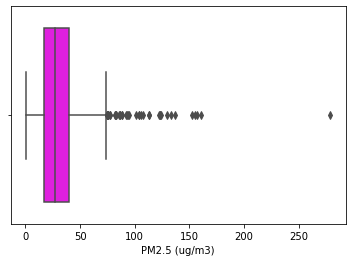

In [73]:
warnings.filterwarnings('ignore')
sns.boxplot(df17['PM2.5 (ug/m3)'],color='magenta')

# we can clearly see that data points above 65 are considered to be outliers in PM2.5 column

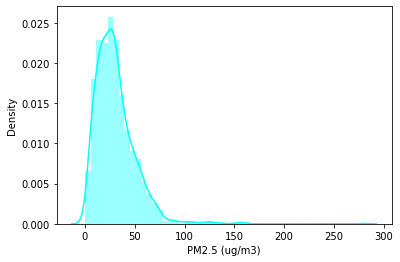

In [74]:
warnings.filterwarnings('ignore')
sns.distplot(df17['PM2.5 (ug/m3)'],color='cyan')

#This plots helps us to identify the nature of distribution. The PM 2.5 is highly skewed and diviates from mean.

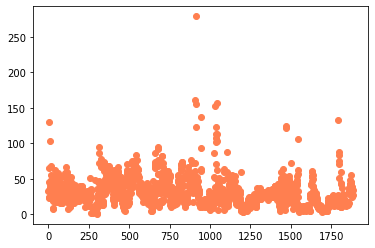

In [75]:
plt.scatter(df17.index,df17['PM2.5 (ug/m3)'],c='coral')

*METHOD 1*

**Z-score treatment**

Assumption: Data normally distributed

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be a outlier.

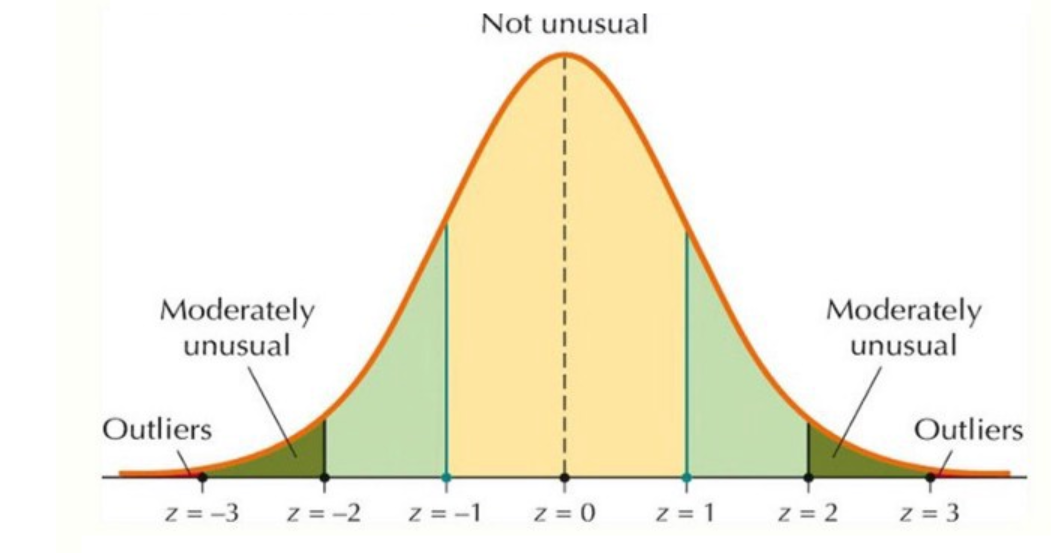

In [76]:
#Column used for Z scroe outlier detection: NO2
df10 = pd.read_excel (r'/content/Data 2017-2022.xlsx', sheet_name='Chennai')

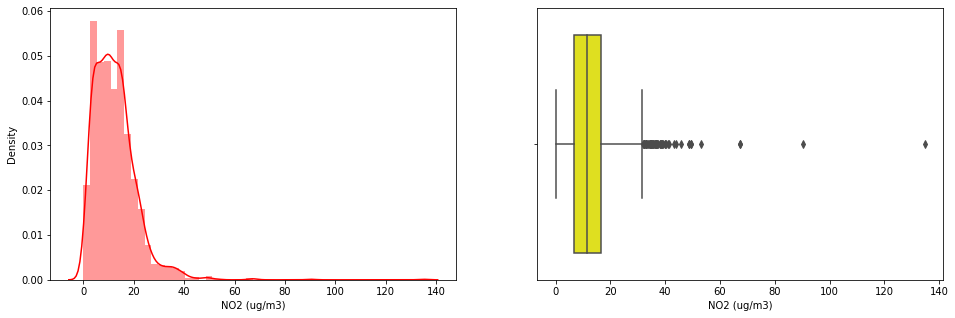

In [77]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df10['NO2 (ug/m3)'],color='red')
plt.subplot(1,2,2)
sns.boxplot(df10['NO2 (ug/m3)'],color='yellow')
#this is the histogram and box plot before oultier detection and handling. The data is positively skewed and contains ouliers.

In [78]:
#any value above the upper limit and below lower limit are considered to be outliers.
#Upper Limit=mean+ 3*standard deviation
#Lower Limit=Mean -3*standard deviation

upper_limit = df10['NO2 (ug/m3)'].mean() + 3*df10['NO2 (ug/m3)'].std()
lower_limit = df10['NO2 (ug/m3)'].mean() - 3*df10['NO2 (ug/m3)'].std()
print(upper_limit,lower_limit)

38.679623230940415 -13.564929796322787


In [79]:
#rows with outliers in NO2 column
df10[(df10['NO2 (ug/m3)'] > upper_limit) | (df10['NO2 (ug/m3)'] < lower_limit)]

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
180,30-Jun-2017 - 00:00,01-Jul-2017 - 00:00,31.75,NaN,27.48,67.25,NaN,NaN,2.89,NaN,27.53,1.11,3.06
249,07-Sep-2017 - 00:00,08-Sep-2017 - 00:00,19.21,NaN,16.52,67.18,NaN,NaN,3.19,2.09,22.56,0.05,2.47
250,08-Sep-2017 - 00:00,09-Sep-2017 - 00:00,22.40,NaN,7.39,39.90,NaN,NaN,3.54,2.06,14.14,0.03,1.93
318,15-Nov-2017 - 00:00,16-Nov-2017 - 00:00,37.34,NaN,7.71,39.89,24.58,NaN,19.52,NaN,23.73,0.42,3.51
341,08-Dec-2017 - 00:00,09-Dec-2017 - 00:00,40.15,NaN,8.72,40.23,25.51,NaN,12.88,0.00,46.45,2.27,5.31
450,27-Mar-2018 - 00:00,28-Mar-2018 - 00:00,36.68,NaN,4.77,38.92,16.36,NaN,5.31,0.88,8.53,1.52,1.58
451,28-Mar-2018 - 00:00,29-Mar-2018 - 00:00,26.03,NaN,7.38,43.96,20.62,NaN,4.19,1.05,8.64,0.85,0.68
452,29-Mar-2018 - 00:00,30-Mar-2018 - 00:00,26.92,NaN,4.10,41.06,17.44,NaN,4.44,0.60,16.80,0.52,0.03
485,01-May-2018 - 00:00,02-May-2018 - 00:00,60.14,NaN,27.83,134.76,85.59,NaN,3.61,0.74,42.12,0.74,1.18
486,02-May-2018 - 00:00,03-May-2018 - 00:00,70.31,NaN,25.57,90.25,62.20,NaN,4.42,0.66,57.81,1.36,2.22


In [80]:
#Rows excluding outliers values in NO2 column
new_df = df10[(df10['NO2 (ug/m3)'] < upper_limit) & (df10['NO2 (ug/m3)'] > lower_limit)]
new_df.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,NaN,2.36,9.78,NaN,NaN,2.11,NaN,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,NaN,2.33,8.21,NaN,NaN,2.86,NaN,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,NaN,11.39,17.28,NaN,NaN,7.73,NaN,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,NaN,6.06,12.32,NaN,NaN,2.72,NaN,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,NaN,5.58,12.67,NaN,NaN,2.65,NaN,25.89,0.60,3.53


In [81]:
#CAPPING --> In this technique, we cap our outliers data and make the limit (we replace the oultier values with upper limit and lower limit respectively)
new_df_cap = df10.copy()
new_df_cap['NO2 (ug/m3)'] = np.where( new_df_cap['NO2 (ug/m3)'] > upper_limit,upper_limit,
                                     np.where(new_df_cap['NO2 (ug/m3)'] < lower_limit, lower_limit,new_df_cap['NO2 (ug/m3)']))

In [82]:
df10['NO2 (ug/m3)'].describe()

count    1843.000000
mean       12.557347
std         8.707426
min         0.020000
25%         6.510000
50%        11.280000
75%        16.470000
max       134.760000
Name: NO2 (ug/m3), dtype: float64

In [83]:
new_df_cap['NO2 (ug/m3)'].describe()
#It is evident the maximum value has come nearer to the mean of the data. and there are slight variations in statistical parameters after handling outliers.

count    1843.000000
mean       12.401293
std         7.738514
min         0.020000
25%         6.510000
50%        11.280000
75%        16.470000
max        38.679623
Name: NO2 (ug/m3), dtype: float64

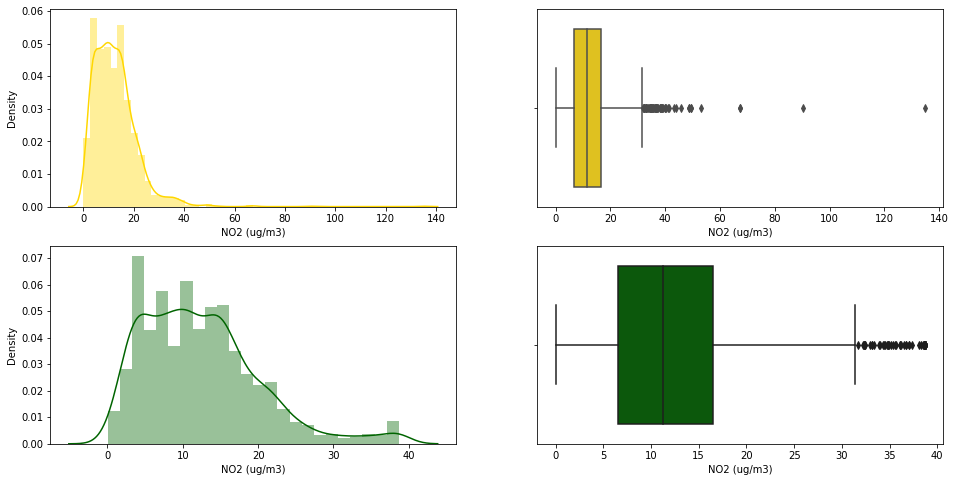

In [84]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df10['NO2 (ug/m3)'],color='gold' )
plt.subplot(2,2,2)
sns.boxplot(df10['NO2 (ug/m3)'],color='gold' )
plt.subplot(2,2,3)
sns.distplot(new_df_cap['NO2 (ug/m3)'],color='darkgreen')
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['NO2 (ug/m3)'],color='darkgreen')
plt.show()

# from histogram we can see that after handling outliers using capping technique, the data points have become normally distributed.
# The box plot before and after removal of ouliers, the range of values have reduced  from 0-140 to 0-40.

*METHOD 2*

**IQR based filtering**

For Skewed data distribution.

Ouliers are:
>greater than 75th percentile + 1.5 IQR

>less than the 25th percentile – 1.5 IQR


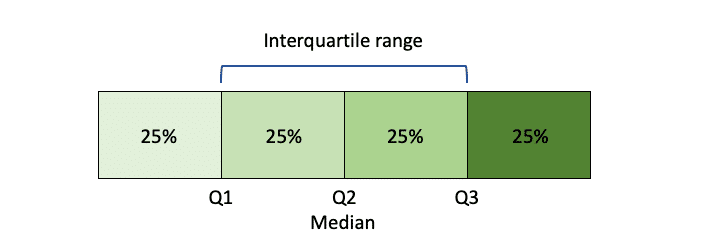

In [85]:
df11 = pd.read_excel (r'/content/Data 2017-2022.xlsx', sheet_name='Chennai')

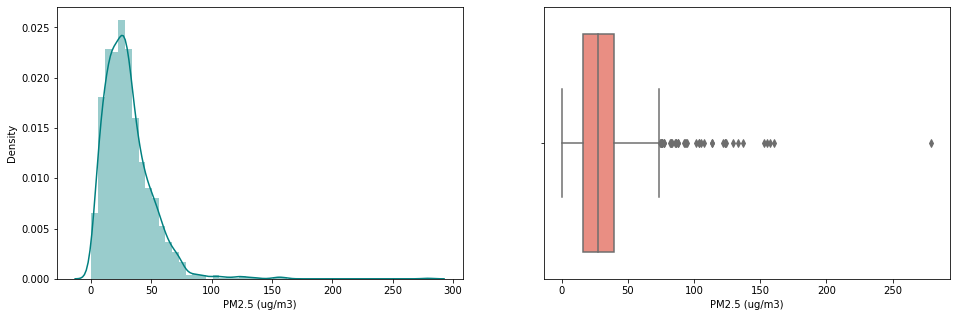

In [86]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df11['PM2.5 (ug/m3)'],color='teal')
plt.subplot(1,2,2)
sns.boxplot(df11['PM2.5 (ug/m3)'],color='salmon')
# The data is positively skewed and above 80 all are considered to be ouliers in PM 2.5 column.

In [87]:
#Inter quatile range is an statistical parameter which helps in identifying the outliers in the dataset.
# Q1+1.5*IQR and Q3-1.5*IQR are considered as outlier in this method, where Q1 and Q2 are lower quartile (25%) and upper quartile(75%).

Q1 = df11['PM2.5 (ug/m3)'].quantile(0.25)
Q3 = df11['PM2.5 (ug/m3)'].quantile(0.75)
IQR=Q3-Q1

In [88]:
upper_limit = Q1 + 1.5 * IQR
lower_limit = Q3 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

51.025
5.045000000000002


In [89]:
#rows with outliers in PM 2.5 column
df11[(df11['PM2.5 (ug/m3)'] > upper_limit) | (df11['PM2.5 (ug/m3)'] < lower_limit)]

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,NaN,5.58,12.67,NaN,NaN,2.65,NaN,25.89,0.60,3.53
5,06-Jan-2017 - 00:00,07-Jan-2017 - 00:00,64.52,NaN,6.91,14.38,NaN,NaN,2.28,NaN,25.16,0.74,3.80
12,13-Jan-2017 - 00:00,14-Jan-2017 - 00:00,103.51,NaN,32.73,38.26,NaN,NaN,2.65,NaN,30.94,6.60,4.35
14,15-Jan-2017 - 00:00,16-Jan-2017 - 00:00,54.93,NaN,16.29,20.86,NaN,NaN,3.54,NaN,45.14,1.00,2.82
19,20-Jan-2017 - 00:00,21-Jan-2017 - 00:00,68.26,NaN,2.86,18.64,NaN,NaN,4.17,NaN,62.39,0.26,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,04-Dec-2021 - 00:00,05-Dec-2021 - 00:00,82.82,24.72,13.23,14.48,27.72,18.35,9.35,0.82,39.26,0.00,0.00
1799,05-Dec-2021 - 00:00,06-Dec-2021 - 00:00,88.01,24.56,14.49,14.46,28.94,18.53,9.39,0.82,23.70,0.00,0.00
1801,07-Dec-2021 - 00:00,08-Dec-2021 - 00:00,74.48,82.86,15.32,14.44,29.76,18.71,9.41,0.87,9.26,0.00,0.00
1812,18-Dec-2021 - 00:00,19-Dec-2021 - 00:00,59.56,43.90,12.05,14.57,23.76,17.74,9.38,0.87,31.00,0.00,0.00


In [90]:
#dataset excluding the rows which have outliers in PM 2.5 column
df11[(df11['PM2.5 (ug/m3)'] < upper_limit) & (df11['PM2.5 (ug/m3)'] > lower_limit)]

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,NaN,2.36,9.78,NaN,NaN,2.11,NaN,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,NaN,2.33,8.21,NaN,NaN,2.86,NaN,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,NaN,11.39,17.28,NaN,NaN,7.73,NaN,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,NaN,6.06,12.32,NaN,NaN,2.72,NaN,19.42,0.65,3.98
6,07-Jan-2017 - 00:00,08-Jan-2017 - 00:00,45.01,NaN,5.72,9.66,NaN,NaN,2.19,NaN,35.32,0.36,3.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,24-Feb-2022 - 00:00,25-Feb-2022 - 00:00,32.05,64.31,6.21,11.89,18.10,18.37,20.30,1.22,103.20,0.00,0.00
1881,25-Feb-2022 - 00:00,26-Feb-2022 - 00:00,38.95,74.92,11.21,14.10,25.32,27.52,20.64,1.13,46.97,0.00,0.00
1882,26-Feb-2022 - 00:00,27-Feb-2022 - 00:00,38.40,74.07,NaN,NaN,NaN,NaN,21.26,0.95,63.83,0.00,0.00
1883,27-Feb-2022 - 00:00,28-Feb-2022 - 00:00,27.51,57.33,NaN,NaN,NaN,NaN,21.77,1.05,84.68,0.00,0.00


In [91]:
#capping the oultiers with the maximum and minimum
new_df_cap = df11.copy()
new_df_cap['PM2.5 (ug/m3)'] = np.where(new_df_cap['PM2.5 (ug/m3)'] > upper_limit,upper_limit,
    np.where(new_df_cap['PM2.5 (ug/m3)'] < lower_limit,lower_limit,new_df_cap['PM2.5 (ug/m3)']))

In [92]:
df11['PM2.5 (ug/m3)'].describe()

count    1841.000000
mean       30.500435
std        20.289850
min         0.410000
25%        16.540000
50%        27.280000
75%        39.530000
max       278.970000
Name: PM2.5 (ug/m3), dtype: float64

In [93]:
new_df_cap['PM2.5 (ug/m3)'].describe()
#The maximum value is deviated towards the maen unlike before capping. 

count    1841.000000
mean       28.310193
std        14.220360
min         5.045000
25%        16.540000
50%        27.280000
75%        39.530000
max        51.025000
Name: PM2.5 (ug/m3), dtype: float64

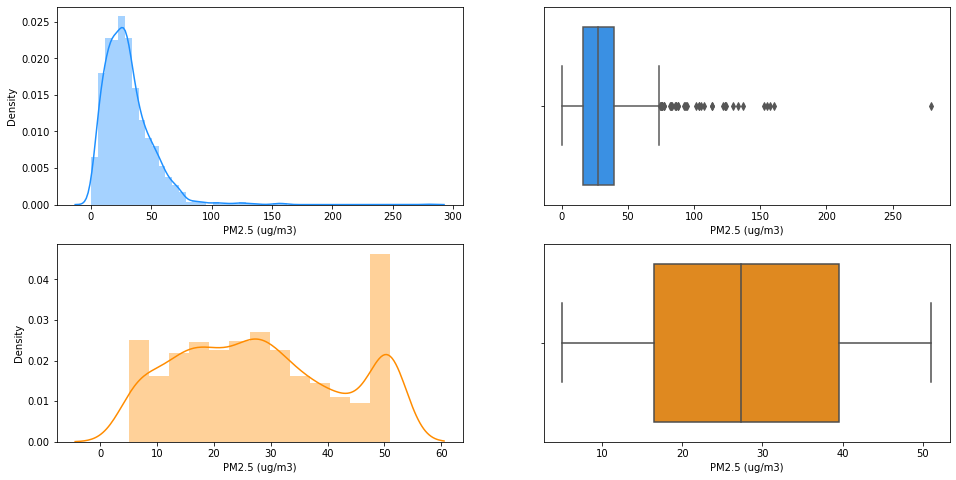

In [94]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df11['PM2.5 (ug/m3)'],color='dodgerblue' )
plt.subplot(2,2,2)
sns.boxplot(df11['PM2.5 (ug/m3)'],color='dodgerblue' )
plt.subplot(2,2,3)
sns.distplot(new_df_cap['PM2.5 (ug/m3)'],color='darkorange')
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['PM2.5 (ug/m3)'],color='darkorange')
plt.show()

# data distribution have change from positively skewed to normal distribution and ouliers are completely removed.

*METHOD 3*

**Percentile**

– This technique works by setting a particular threshold value(user defined, or domain specific).

– While capping, we use a method is known as Winsorization.

– Symmetry is maintained on both sides means if remove 1% from the right then in the left we also drop by 1%.

--For Other distributions: Use percentile-based approach. 

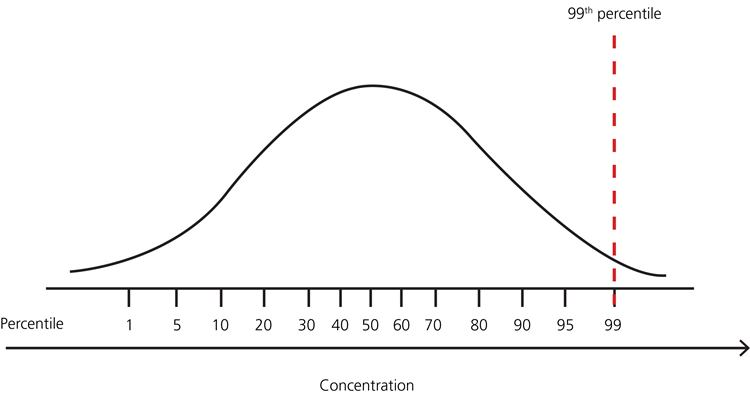

In [95]:
df12 = pd.read_excel (r'/content/Data 2017-2022.xlsx', sheet_name='Chennai')

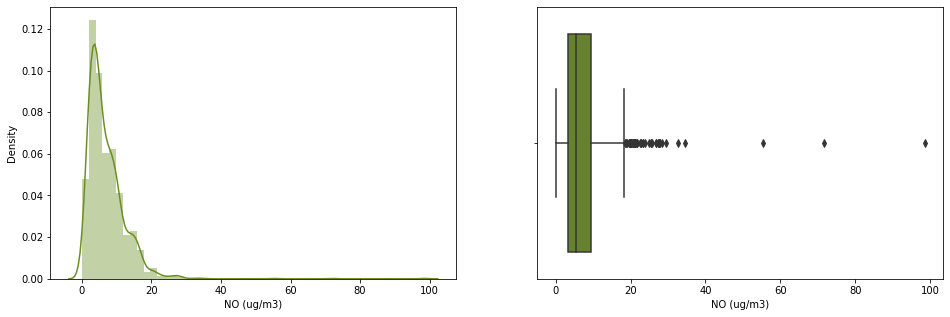

In [96]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df12['NO (ug/m3)'],color='olivedrab')
plt.subplot(1,2,2)
sns.boxplot(df12['NO (ug/m3)'],color='olivedrab')

#NO values are skewed and outliers are present

In [97]:
upper_limit = df12['NO (ug/m3)'].quantile(0.90)
lower_limit = df12['NO (ug/m3)'].quantile(0.10)
print(upper_limit,lower_limit)

# unlike inter quartile range, the percentage value which is considered to be outlier is not fixed.
# But same percent of data points are detected as ouliers in both extremes.

13.881000000000002 2.07


In [98]:
#rows with outliers
df12[(df12['NO (ug/m3)'] > upper_limit) | (df12['NO (ug/m3)'] < lower_limit)]

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
11,12-Jan-2017 - 00:00,13-Jan-2017 - 00:00,42.32,NaN,22.63,26.31,NaN,NaN,2.57,NaN,30.78,0.74,3.52
12,13-Jan-2017 - 00:00,14-Jan-2017 - 00:00,103.51,NaN,32.73,38.26,NaN,NaN,2.65,NaN,30.94,6.60,4.35
13,14-Jan-2017 - 00:00,15-Jan-2017 - 00:00,33.96,NaN,24.83,27.27,NaN,NaN,2.48,NaN,44.53,0.23,0.77
14,15-Jan-2017 - 00:00,16-Jan-2017 - 00:00,54.93,NaN,16.29,20.86,NaN,NaN,3.54,NaN,45.14,1.00,2.82
54,24-Feb-2017 - 00:00,25-Feb-2017 - 00:00,21.08,NaN,26.66,37.35,NaN,NaN,22.53,NaN,34.30,1.64,2.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,26-Dec-2021 - 00:00,27-Dec-2021 - 00:00,18.97,33.59,16.36,20.26,33.89,21.71,9.41,0.84,25.79,0.00,0.00
1821,27-Dec-2021 - 00:00,28-Dec-2021 - 00:00,17.11,30.60,23.86,19.33,40.42,22.65,9.41,0.76,24.77,0.00,0.00
1822,28-Dec-2021 - 00:00,29-Dec-2021 - 00:00,18.40,32.68,16.55,19.39,35.94,21.86,9.39,0.78,21.34,0.00,0.00
1826,01-Jan-2022 - 00:00,02-Jan-2022 - 00:00,16.89,30.25,14.07,14.47,28.54,18.48,9.39,0.78,36.92,0.00,0.00


In [ ]:
#rows excluding outliers
df12[(df12['NO (ug/m3)'] <= upper_limit) & (df12['NO (ug/m3)'] >= lower_limit)]

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3)
0,01-Jan-2017 - 00:00,02-Jan-2017 - 00:00,32.61,NaN,2.36,9.78,NaN,NaN,2.11,NaN,24.63,0.52,2.95
1,02-Jan-2017 - 00:00,03-Jan-2017 - 00:00,22.93,NaN,2.33,8.21,NaN,NaN,2.86,NaN,20.49,0.13,2.01
2,03-Jan-2017 - 00:00,04-Jan-2017 - 00:00,24.19,NaN,11.39,17.28,NaN,NaN,7.73,NaN,13.04,0.45,3.52
3,04-Jan-2017 - 00:00,05-Jan-2017 - 00:00,33.61,NaN,6.06,12.32,NaN,NaN,2.72,NaN,19.42,0.65,3.98
4,05-Jan-2017 - 00:00,06-Jan-2017 - 00:00,129.38,NaN,5.58,12.67,NaN,NaN,2.65,NaN,25.89,0.60,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,22-Feb-2022 - 00:00,23-Feb-2022 - 00:00,31.25,63.08,5.02,9.97,14.98,14.92,20.20,1.18,167.65,0.00,0.00
1879,23-Feb-2022 - 00:00,24-Feb-2022 - 00:00,24.57,52.81,4.44,9.82,14.25,13.56,20.15,1.33,162.59,0.00,0.00
1880,24-Feb-2022 - 00:00,25-Feb-2022 - 00:00,32.05,64.31,6.21,11.89,18.10,18.37,20.30,1.22,103.20,0.00,0.00
1881,25-Feb-2022 - 00:00,26-Feb-2022 - 00:00,38.95,74.92,11.21,14.10,25.32,27.52,20.64,1.13,46.97,0.00,0.00


In [99]:
#capping to handle outliers
new_df_cap = df12.copy()
new_df_cap['NO (ug/m3)'] = np.where(new_df_cap['NO (ug/m3)'] > upper_limit,upper_limit,
    np.where(new_df_cap['NO (ug/m3)'] < lower_limit,lower_limit,new_df_cap['NO (ug/m3)']))

In [100]:
df12['NO (ug/m3)'].describe()

count    1844.000000
mean        6.952950
std         5.611016
min         0.010000
25%         3.295000
50%         5.460000
75%         9.400000
max        98.620000
Name: NO (ug/m3), dtype: float64

In [101]:
new_df_cap['NO (ug/m3)'].describe()
#removal of outliers will affect all statistical parameters considerably.

count    1844.000000
mean        6.557823
std         3.856485
min         2.070000
25%         3.295000
50%         5.460000
75%         9.400000
max        13.881000
Name: NO (ug/m3), dtype: float64

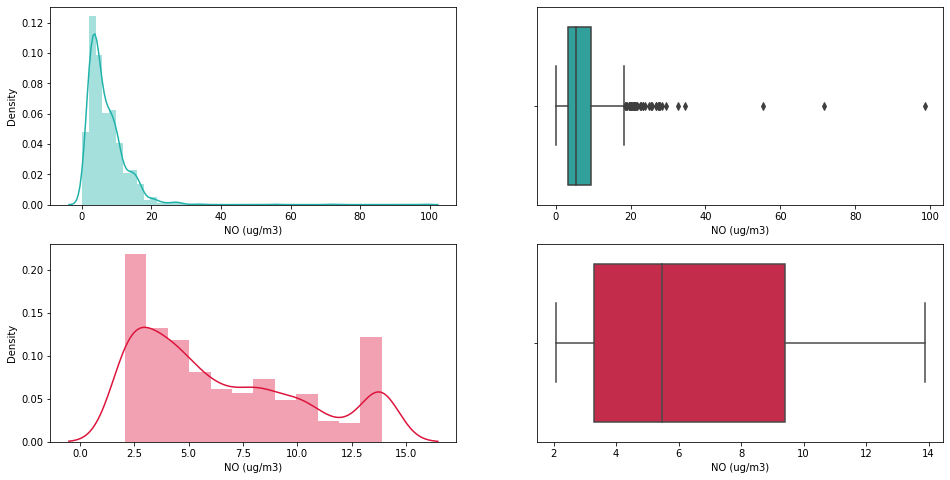

In [102]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df12['NO (ug/m3)'],color='lightseagreen' )
plt.subplot(2,2,2)
sns.boxplot(df12['NO (ug/m3)'],color='lightseagreen')
plt.subplot(2,2,3)
sns.distplot(new_df_cap['NO (ug/m3)'],color='crimson')
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['NO (ug/m3)'],color='crimson')
plt.show()

#graphically representation gives a clear view of how outlier analysis can improve the distribution of data points.

There are many more advanced ways to handle outliers. But among these 3 methods, IQR seems to be the most effective one, though it changes from one analysis to analyis. 

Outliers, unless they are data entry errors, are always an important part of a data set.

Figuring out why they are important is challenging and needs lot of analytical and lo. Then you have to figure out what to do about them.

REFERENCES :-
https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

https://github.com/atulpatelDS/Youtube/blob/main/Data_Cleaning/Hands-on%20Handling%20missing%20value%20with%20List%20%26%20Pairwise%20Deletion%20with%20Python%20-%20Data%20Cleaning%20Tutorial%206.ipynb

https://www.analyticsvidhya.com/blog/2021/10/a-complete-guide-to-dealing-with-missing-values-in-python/

https://towardsdatascience.com/missing-data-and-imputation-89e9889268c8

https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/



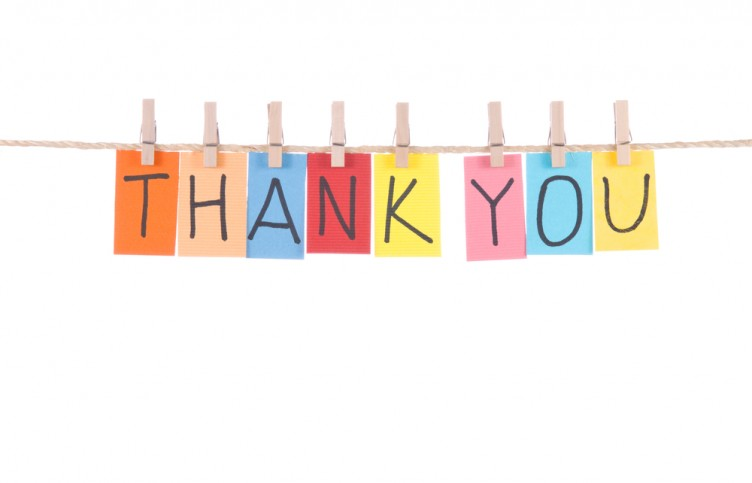